In [2]:
using Turing
using Statistics: mean, std
using StatsBase:mad
using Random:seed!
seed!(123)

@model robustreg(X, y; predictors=size(X, 2)) = begin
    #priors
    νₐ ~ LogNormal(1, 1)
    νᵦ ~ LogNormal(1, 1)
    α ~ LocationScale(median(y), 2.5 * mad(y), TDist(νₐ))
    β ~ filldist(TDist(νᵦ), predictors)
    σ ~ Exponential(1)
    ν ~ LogNormal(2, 1)

    #likelihood
    y ~ arraydist(LocationScale.(α .+ X * β, σ, TDist.(ν)))
end;

"C:\\Users\\user\\Documents\\wiki\\wiki\\dev\\python\\Python-Stock\\data\\raw"

LoadError: syntax: invalid keyword argument name "dir::AbstractString" around In[16]:1

In [19]:
using DataFrames, CSV, HTTP

states = DataFrame(CSV.File("c:/users/user/Documents/wiki/wiki/dev/python/python-ml/data/raw/states.csv", header=1, delim=","))
describe(states)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,States,,Alabama,,Wyoming,0,String
2,Poverty,12.732,7.6,12.4,21.2,0,Float64
3,Infant Mort,6.83,4.7,6.85,10.6,0,Float64
4,White,81.962,29.7,84.55,96.4,0,Float64
5,Crime,407.48,118,345.5,788,0,Int64
6,Doctors,260.276,168.8,249.05,469.0,0,Float64
7,Traf Deaths,1.4044,0.76,1.375,2.45,0,Float64
8,University,26.94,17.1,26.2,38.1,0,Float64
9,Unemployed,5.27,3.0,5.3,8.4,0,Float64


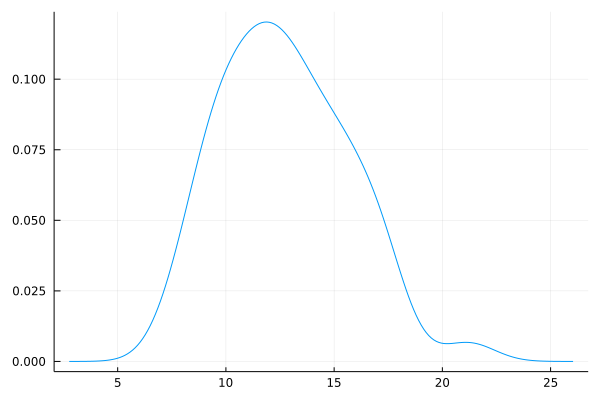

In [9]:
@df states density(:Poverty, label=false)

In [10]:
gdf_type = groupby(states, :Poverty)

,States,Poverty,Infant Mort,White,Crime,Doctors,Traf Deaths,University
,String,Float64,Float64,Float64,Int64,Float64,Float64,Float64
1,Alabama,15.7,9.0,71.0,448,218.2,1.81,22.0
2,South Carolina,15.7,8.4,68.7,788,229.8,2.09,23.7
,States,Poverty,Infant Mort,White,Crime,Doctors,Traf Deaths,University
,String,Float64,Float64,Float64,Int64,Float64,Float64,Float64
1,Wyoming,9.4,7.0,93.9,239,184.4,1.6,23.6


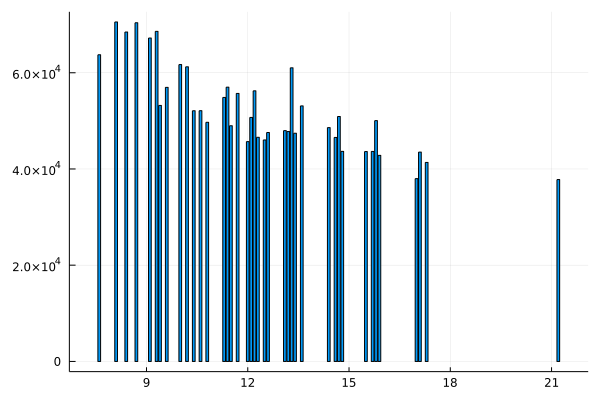

In [11]:
@df combine(gdf_type, :Income => mean) bar(:Poverty, :Income_mean, label=false)

In [12]:
X = select(states, Not([:Poverty,:States]))
y = states[:, :Poverty]
model = robustreg(Matrix(X), y);

In [13]:
chain = sample(model, NUTS(), MCMCThreads(), 2_000, 4)
summarystats(chain)

┌ Warning: Only a single thread available: MCMC chains are not sampled in parallel
└ @ AbstractMCMC C:\Users\User\.julia\packages\AbstractMCMC\BPJCW\src\sample.jl:291
┌ Info: Found initial step size
│   ϵ = 0.025
└ @ Turing.Inference C:\Users\User\.julia\packages\Turing\YGtAo\src\inference\hmc.jl:188
┌ Info: Found initial step size
│   ϵ = 0.003125
└ @ Turing.Inference C:\Users\User\.julia\packages\Turing\YGtAo\src\inference\hmc.jl:188
┌ Info: Found initial step size
│   ϵ = 0.05
└ @ Turing.Inference C:\Users\User\.julia\packages\Turing\YGtAo\src\inference\hmc.jl:188
┌ Info: Found initial step size
│   ϵ = 0.05
└ @ Turing.Inference C:\Users\User\.julia\packages\Turing\YGtAo\src\inference\hmc.jl:188
Sampling (1 threads): 100%|█████████████████████████████| Time: 0:12:09


Summary Statistics
  parameters              mean              std       naive_se            mcse ⋯
      Symbol           Float64          Float64        Float64         Float64 ⋯

          νₐ            3.5137           3.3761         0.0377          0.3798 ⋯
          νᵦ            1.2904           1.1369         0.0127          0.1279 ⋯
           α            9.1106          10.3956         0.1162          1.1695 ⋯
        β[1]           -1.1338           3.3642         0.0376          0.3785 ⋯
        β[2]           -0.0012           1.3694         0.0153          0.1541 ⋯
        β[3]           -0.5963           0.7911         0.0088          0.0890 ⋯
        β[4]            1.9436          21.2551         0.2376          2.3912 ⋯
        β[5]   -220190076.8921   381404250.0166   4264229.1497   42908648.6636 ⋯
        β[6]            4.7192           8.2167         0.0919          0.9244 ⋯
        β[7]            2.2526           4.0858         0.0457          0.4597 ⋯
        

In [14]:
quantile(chain)

Quantiles
  parameters              2.5%             25.0%     50.0%     75.0%     97.5% ⋯
      Symbol           Float64           Float64   Float64   Float64   Float64 ⋯

          νₐ            0.4794            1.1199    2.2192    4.6152    9.1371 ⋯
          νᵦ            0.2639            0.5162    0.8528    1.6261    3.1952 ⋯
           α            0.7196            0.7402    4.7640   13.1366   26.1932 ⋯
        β[1]           -6.4423           -2.1972   -0.4851    0.5799    2.8775 ⋯
        β[2]           -1.3110           -1.2411   -0.3537    0.8883    2.0115 ⋯
        β[3]           -1.9389           -0.7624   -0.2645   -0.0978    0.0827 ⋯
        β[4]          -27.7807           -7.5319    1.7139   11.1899   32.1276 ⋯
        β[5]   -880760326.6328   -220190082.4181   -0.0425    5.4827   19.1489 ⋯
        β[6]           -1.2132           -0.0013    0.5996    5.3192   18.8912 ⋯
        β[7]           -0.9197           -0.4568    0.3513    3.0616    9.2273 ⋯
        β[8]     